In this notebook I will look at the radio source catalogs (.sou file) from a VLBI solution denoted as `icrf2-ga-09` and `icrf2-nga-09`.

The solution `icrf2-nga-09` used sessions and analysis strategies that are similar to the ICRF2 solution. 

The only difference between `icrf2-ga-09` and `icrf2-nga-09` is that we modeled the Galactic aberration effect in `icrf2-ga-09`.


Three comparisons need to do done:

- icrf2-nga-09 vs. ICRF2
- icrf2-nga-09 vs. Gaia DR2
- icrf2-ga-09 vs. Gaia DR2

The first comparison is to check if I can nearly reproduce the ICRF2 solution.

In [1]:
from astropy.table import Table, Column
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The two solutions are loaded from .sou files and there are **3581** sources in both solution.

In [2]:
from my_progs.vlbi.read_sou import read_sou

solnga = read_sou("../data/icrf2-nga-09/icrf2-nga-09.sou")
solga = read_sou("../data/icrf2-ga-09/icrf2-ga-09.sou")

In [3]:
solga

ivs_name,iers_name,ra,ra_err,dec,dec_err,ra_dec_corr,used_obs,pos_err,total_obs,used_sess,total_sess,beg_date,end_date
,,deg,mas,deg,mas,,,mas,,,,MJD,MJD
str100,str8,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64
0000+212,0000+212,0.830625050125,0.32342271422786095,21.49569659988889,0.6666,-0.422,66,0.6835091156999804,218,2,2,50084.0,50155.0
0000-160,0000-160,0.8636123308333334,110.00486183616133,-15.784827949333334,142.8992,0.997,2,180.21005995720097,81,1,1,54817.0,54817.0
0000-197,0000-197,0.8278125884583334,0.32661929191427086,-19.456209709777777,0.6356,-0.224,76,0.6411638657099903,87,2,2,50631.0,50687.0
0000-199,0000-199,0.816455943125,1.6302775547975004,-19.697333934472223,4.5932,-0.814,11,4.788550020103237,36,1,1,54087.0,54087.0
0001+459,0001+459,1.06719852375,0.20743503592194093,46.254991693166666,0.4202,0.102,76,0.4209006627006815,78,1,1,50305.0,50305.0
0001+478,0001+478,0.9418378979583335,127.61815336153087,48.11781679794444,78.0953,-0.99,1,149.3205173227395,1,1,1,50305.0,50305.0
0001-120,0001-120,1.0204791384583334,0.09631485130236306,-11.816218266527779,0.2163,-0.155,109,0.21693696695662976,193,3,3,50575.0,53133.0
0002+051,0002+051,1.3342312861666668,1.3841229462693878,5.403000226722223,1.4772,-0.106,26,1.5176719438613964,36,1,1,49913.0,49913.0


A good habit is to check the dependency of the formal uncertainties on the declination.

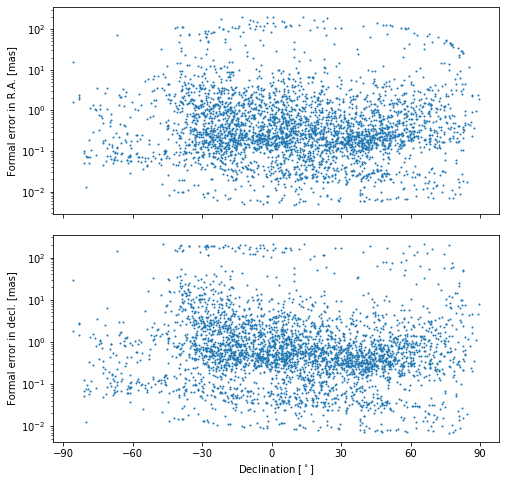

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(solga["dec"], solga["ra_err"], ".", ms=2)
ax1.plot(solga["dec"], solga["dec_err"], ".", ms=2)

ax0.set_yscale("log")
ax1.set_yscale("log")

ax1.set_xlabel("Declination [$^\circ$]")
ax0.set_ylabel("Formal error in R.A. [mas]")
ax1.set_ylabel("Formal error in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

plt.subplots_adjust(hspace=0.1)

# 1) Compare icrf2-nga-09 versus ICRF2


In [5]:
from my_progs.catalog.read_icrf import read_icrf2
icrf2 = read_icrf2()

In [7]:
from my_progs.catalog.pos_diff import radio_cat_diff_calc

# Crossmatch between ICRF2 and solution
icrfdif1 = radio_cat_diff_calc(solnga, icrf2, sou_name="iers_name")

icrfdif1

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,dec,ra_err_2,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,deg,mas,mas,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000+212,0.3234227142039014,0.6666,0.6835091156969811,0.83062514625,21.49569653825,0.5960896489006478,1.2524999999999997,1.2901253012295735,-0.25191800860601415,0.26069999279343387,0.6781777949693694,1.4188417142162122,-0.44486997451125226,0.36252885306209254,-0.37146307424794456,0.18374142103472632,0.3717095776363523
0000-197,0.32661929193625466,0.6356,0.6411638657109745,0.8278126013333333,-19.456209681833332,0.4859687733303084,0.9445999999999999,0.9528939533621429,0.03436857177704973,-0.0612999954796578,0.5855303668616215,1.138532617011915,-0.14932855285431837,0.07027722370583721,0.058696480528006606,-0.053841229108165536,0.07203257963729474
0000-199,1.6302775548424904,4.5932,4.788550020114193,0.8164555134166667,-19.697332749361113,4.6366314167931675,13.643499999999998,14.33480339351269,1.535799422936879,-4.2504999967718495,4.914891229825603,14.395922286883877,-65.74945489715222,4.519450197761974,0.3124788222406652,-0.2952572202091199,0.3127581661915029
0001+459,0.20743503589630327,0.4202,0.42090066270045395,1.0671985645,46.254991665472225,0.31664958249475456,0.6327999999999999,0.6337693172688701,-0.034019345959561936,0.1241000006757531,0.3785449143911499,0.7596077145474498,0.02812683076958726,0.12867838228404288,-0.08986871746587459,0.16337380242338367,0.19494445786477757
0001-120,0.09631485130652458,0.2163,0.21693696695669773,1.0204791624583331,-11.816218260277779,0.1286155636323102,0.27809999999999996,0.27829570699166345,-0.012186176493765494,0.020100004860523765,0.1606814046199957,0.3523142063556336,-0.005804395016050669,0.023505597055388353,-0.07584061467837709,0.05705136068295351,0.09058501573673583
0002+051,1.3841229462433025,1.4772,1.517671943854582,1.334231308083333,5.4030002428333335,2.0590110604892575,2.1965,2.2560632855384,-0.0037333375998030625,-0.016899998200869955,2.4809923171050605,2.6470232507479037,-0.691605268524493,0.017307447784798053,-0.0015047759616439674,-0.006384529563952618,0.006749467456189263
0002+200,0.13681286974140705,0.1636,0.16447242059674042,1.1489929137916663,20.328421525527776,0.20170286691858957,0.24259999999999995,0.24421911780066,0.0028131511485634544,0.03870000000461004,0.2437248609601767,0.2926084756120369,0.005410114524430435,0.0388021110217148,0.01154232332918679,0.13225864330711157,0.1322673015607155
0002+541,0.49891369488195203,0.7499,0.7976172717916639,1.2681810385416665,54.47359068861111,0.7491549969176401,1.1304999999999998,1.2016770811288238,0.07600502099723337,-0.17699999546039177,0.9000822653221376,1.356606155079653,0.5519169069209302,0.19262855865568998,0.08444230480425179,-0.13047264660980343,0.20705624348083587


The cross-match gives a sample of 3362 rather than 3414 common sources.

Possibly these sources are VCS sources.

But it make no sense here.

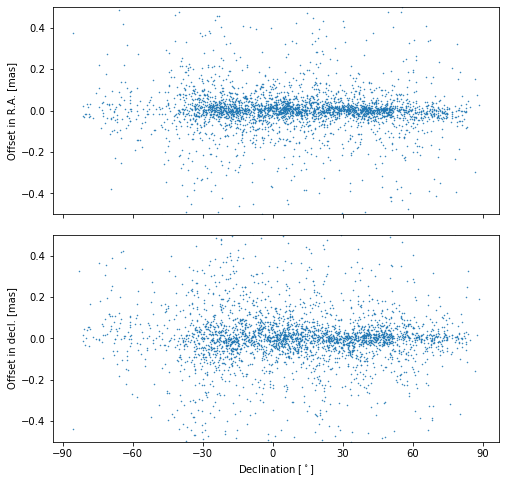

In [8]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(icrfdif1["dec"], icrfdif1["dra"], ".", ms=1)
ax1.plot(icrfdif1["dec"], icrfdif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])

plt.subplots_adjust(hspace=0.1)

The offset scatter in the declination is obviously larger than in the RA.

For most sources, they are below in 0.1 mas, albeit some large offset over 1 mas.

In [9]:
# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting, residual_calc02
from my_progs.catalog.write_output import print_vsh1_corr, print_vsh2_corr

In [10]:
# Try with all the sources
# Transform columns into np.array
dra = np.array(icrfdif1["dra"])
ddec = np.array(icrfdif1["ddec"])
dra_err = np.array(icrfdif1["dra_err"])
ddec_err = np.array(icrfdif1["ddec_err"])
ra_rad = np.array(icrfdif1["ra"].to(u.radian))
dec_rad = np.array(icrfdif1["dec"].to(u.radian))
dra_ddec_cov = np.array(icrfdif1["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
w2_all, sig2_all, corrcoef2_all, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w2 = w2_all * 1.e3
sig2 = sig2_all * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, 
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)


print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_all, deci_digit=1, included_one=False)

Estimates (  3362 sources)
--------------------------------------------------------------------------------------------
               Rotation [uas]                                   Glide [uas]               
               x             y             z               x             y             z
--------------------------------------------------------------------------------------------
l_max=2    -2 +/-   2    +1 +/-   2    +1 +/-   1      +2 +/-   1    -1 +/-   1    -2 +/-   2
--------------------------------------------------------------------------------------------

Quadrupolar term Estimate Error
---------------- -------- -----
            ER22        0     1
            EI22       -0     1
            ER21        3     2
            EI21        4     2
             E20        4     2
            MR22        1     1
            MI22        1     1
            MR21       -2     2
            MI21        1     2
             M20       -0     1
Correlation coefficient between par

Basing on all the common sources between the two data sets and modelling the positional offsets to extract the global (long wavelength) differences, we found no significant terms.

As a result, I reproduced a catalog having similar global properties to the ICRF2.

# 2) icrf2-nga/ga-09 versus the Gaia DR2

In [11]:
from my_progs.catalog.read_gaia import read_dr2_iers

gdr2 = read_dr2_iers()

# Crossmatch between Gaia DR2 and solution
gaiadif1 = radio_cat_diff_calc(solnga, gdr2, sou_name="iers_name")

gaiadif2 = radio_cat_diff_calc(solga, gdr2, sou_name="iers_name")

gaiadif1 

iers_name,ra_err_1,dec_err_1,pos_err_1,pos_err_2,ra,ra_err_2,dec,dec_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000-197,0.32661929193625466,0.6356,0.6411638657109745,0.24241216451703895,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.8258881705337527,0.9006278986589676,0.40459118368285096,0.6640300544374923,-0.040323882349098825,1.2219745832342246,2.0412905763689255,1.3563059271796065,2.64482732802601
0000-199,1.6302775548424904,4.5932,4.788550020114193,0.31218319151974,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,1.4523494982309584,-1.9320158656910278,1.659891355377474,4.597609840412547,-6.094219964848512,2.417023866306158,0.8749666015946456,-0.42022179627092204,0.9897627368510226
0001+459,0.20743503589630327,0.4202,0.42090066270045395,0.777985787941841,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.8135966224679806,0.09669157634561996,0.7992173761120538,0.8138292520633725,-0.024880154010450677,0.8193221131078463,1.0179916588223812,0.11881064252786361,1.0301596172987877
0001-120,0.09631485130652458,0.2163,0.21693696695669773,0.33998919727933147,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,-1.1476463892488489,0.44867393000913575,0.3248454536098506,0.3635006374923274,0.02095954875972428,1.2322339592081382,-3.5328996496506537,1.2343140113986901,4.007359259633918
0002+051,1.3841229462433025,1.4772,1.517671943854582,0.06716510720786427,1.3342312881365477,0.055566707261366505,5.403000767650242,0.043549317950419074,0.06775604724155045,-1.9062408675551976,1.3852378818358637,1.4778417990752417,-0.21480118367380568,1.9074446589810652,0.04891293266666442,-1.2898815480439287,1.2928061090499665
0002+541,0.49891369488195203,0.7499,0.7976172717916639,0.14545837311323823,1.2681808047501304,0.13120835916273907,54.47359019646749,0.13042564468464754,0.5650691744737848,1.5947170368235672,0.515878385334121,0.7611575781606631,0.16506559069572316,1.691870444057648,1.095353460307906,2.0951207510502625,2.10843079344123
0002-170,0.26402690905814885,0.587,0.6070685510646807,0.12802895680534068,1.324724085562965,0.12209945018003658,-16.8012994100183,0.09340584476751623,0.44191798443137553,-1.1354341211244898,0.2908925651182361,0.5943851039828751,-0.08124908088759045,1.2184014725769303,1.5191793721223288,-1.910266784137314,2.0358973930097344
0002-478,0.06337782678662841,0.108,0.11250455588054004,0.4046925099699907,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.2121378129269304,-0.16089780388028882,0.33146550986478623,0.3967355582235198,-0.029396752321749202,0.26625280274002977,0.6399996579235866,-0.4055542805407914,0.6943509208727018


We found **2360** common sources between icrf2-ga-09/icrf2-nga-09 and *Gaia* DR2.

Their positional differences are on the order of 1 mas.

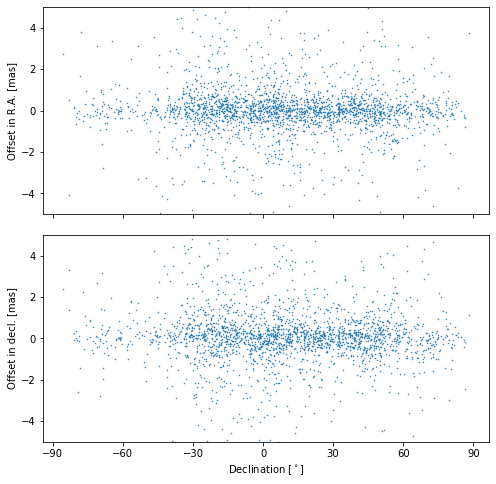

In [14]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(gaiadif1["dec"], gaiadif1["dra"], ".", ms=1)
ax1.plot(gaiadif1["dec"], gaiadif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])

plt.subplots_adjust(hspace=0.1)

In [15]:
# icrf2-nga-09 - gaia dr2
# Transform columns into np.array
dra1 = np.array(gaiadif1["dra"])
ddec1 = np.array(gaiadif1["ddec"])
dra_err1 = np.array(gaiadif1["dra_err"])
ddec_err1 = np.array(gaiadif1["ddec_err"])
ra_rad1 = np.array(gaiadif1["ra"].to(u.radian))
dec_rad1 = np.array(gaiadif1["dec"].to(u.radian))
dra_ddec_cov1 = np.array(gaiadif1["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
w21, sig21, corrcoef21, _, _, _ = vsh_deg02_fitting(
    dra1, ddec1, ra_rad1, dec_rad1, dra_err1, ddec_err1,
    cov=dra_ddec_cov1, elim_flag="None")

# mas -> uas
w21 = w21 * 1.e3
sig21 = sig21 * 1.e3

# icrf2-ga-09 - gaia dr2
# Transform columns into np.array
dra2 = np.array(gaiadif2["dra"])
ddec2 = np.array(gaiadif2["ddec"])
dra_err2 = np.array(gaiadif2["dra_err"])
ddec_err2 = np.array(gaiadif2["ddec_err"])
ra_rad2 = np.array(gaiadif2["ra"].to(u.radian))
dec_rad2 = np.array(gaiadif2["dec"].to(u.radian))
dra_ddec_cov2 = np.array(gaiadif2["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
w22, sig22, corrcoef22, _, _, _ = vsh_deg02_fitting(
    dra2, ddec2, ra_rad2, dec_rad2, dra_err2, ddec_err2,
    cov=dra_ddec_cov2, elim_flag="None")

# mas -> uas
w22 = w22 * 1.e3
sig22 = sig22 * 1.e3

Use a histogram to show these terms clearly.

In [17]:
# icrf2-nga-09 - gaia dr2
gli1 = w21[:3]
rot1 = w21[3:6]
qua1 = w21[6:]

gerr1 = sig21[:3]
rerr1 = sig21[3:6]
qerr1 = sig21[6:]

glimod1, glierr1 = vec_mod_calc(gli1, gerr1)
rotmod1, roterr1 = vec_mod_calc(rot1, rerr1)

# icrf2-ga-09 - gaia dr2
gli2 = w22[:3]
rot2 = w22[3:6]
qua2 = w22[6:]

gerr2 = sig22[:3]
rerr2 = sig22[3:6]
qerr2 = sig22[6:]

glimod2, glierr2 = vec_mod_calc(gli2, gerr2)
rotmod2, roterr2 = vec_mod_calc(rot2, rerr2)

## 2.1) Rotation and glide

In [16]:
from my_progs.catalog.vec_mod import vec_mod_calc

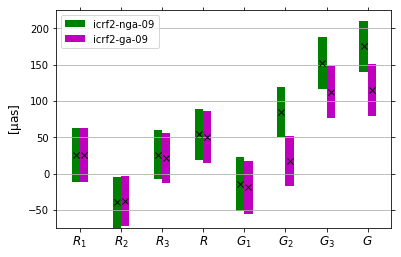

In [34]:
# Rotation
fig, ax = plt.subplots()

barwidth = 0.2
loc = 0.1

terms = ["$R_1$", "$R_2$", "$R_3$", "$R$",
         "$G_1$", "$G_2$", "$G_3$", "$G$"]

pos1 = np.arange(len(terms)) - 1 * loc
pos2 = np.arange(len(terms)) + 1 * loc

par1 = np.concatenate((rot1, [rotmod1], gli1, [glimod1]))
err1 = np.concatenate((rerr1, [roterr1], gerr1, [glierr1]))

par2 = np.concatenate((rot2, [rotmod2], gli2, [glimod2]))
err2 = np.concatenate((rerr2, [roterr2], gerr2, [glierr2]))


ax.bar(pos1, 2 * err1, bottom=par1-err1, width=barwidth,
       color="g", ecolor="black", label="icrf2-nga-09")
ax.bar(pos2, 2 * err2, bottom=par2-err2, width=barwidth,
       color="m", ecolor="black", label="icrf2-ga-09")

ax.plot(pos1, par1, "kx")
ax.plot(pos2, par2, "kx")

ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms, fontsize=12)
ax.set_ylabel("[$\\mathrm{\mu as}$]", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.grid()  # horizontal lines

ax.legend()

## 2.2) Quadruple terms

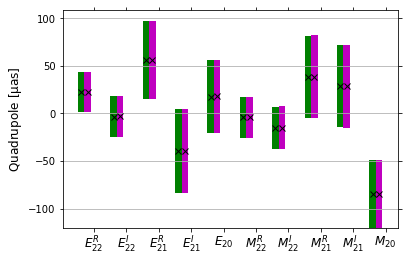

In [39]:
# Quadruple terms

fig, ax = plt.subplots()

barwidth = 0.2
loc = 0.2

terms = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$", ]

pos1 = np.arange(len(terms)) - 2 * loc
pos2 = np.arange(len(terms)) - 1 * loc

ax.bar(pos1, 2 * qerr1, bottom=qua1-qerr1, width=barwidth,
       color="g", ecolor="black", label="icrf2-nga-09")
ax.bar(pos2, 2 * qerr2, bottom=qua2-qerr2, width=barwidth,
       color="m", ecolor="black", label="icrf2-ga-09")

ax.plot(pos1, qua1, "kx")
ax.plot(pos2, qua2, "kx")

ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms, fontsize=12)

ax.set_ylabel("Quadrupole [$\\mathrm{\mu as}$]", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.grid()  # horizontal lines

We can find

- 1) Modeling the GA effect can reduce the glide in Y- and Z-component, bringing the VLBI positions close to the *Gaia* position.
- 2) The glide in Z-component is still significant, even though the Galactic aberration effect is considered. Possibly it reflects the intrinsic errors in the VLBI astrometry.